# 7 Signs You've Become an Advanced Sklearn User Without Even Realizing It
# and a pro ML engineer with that...
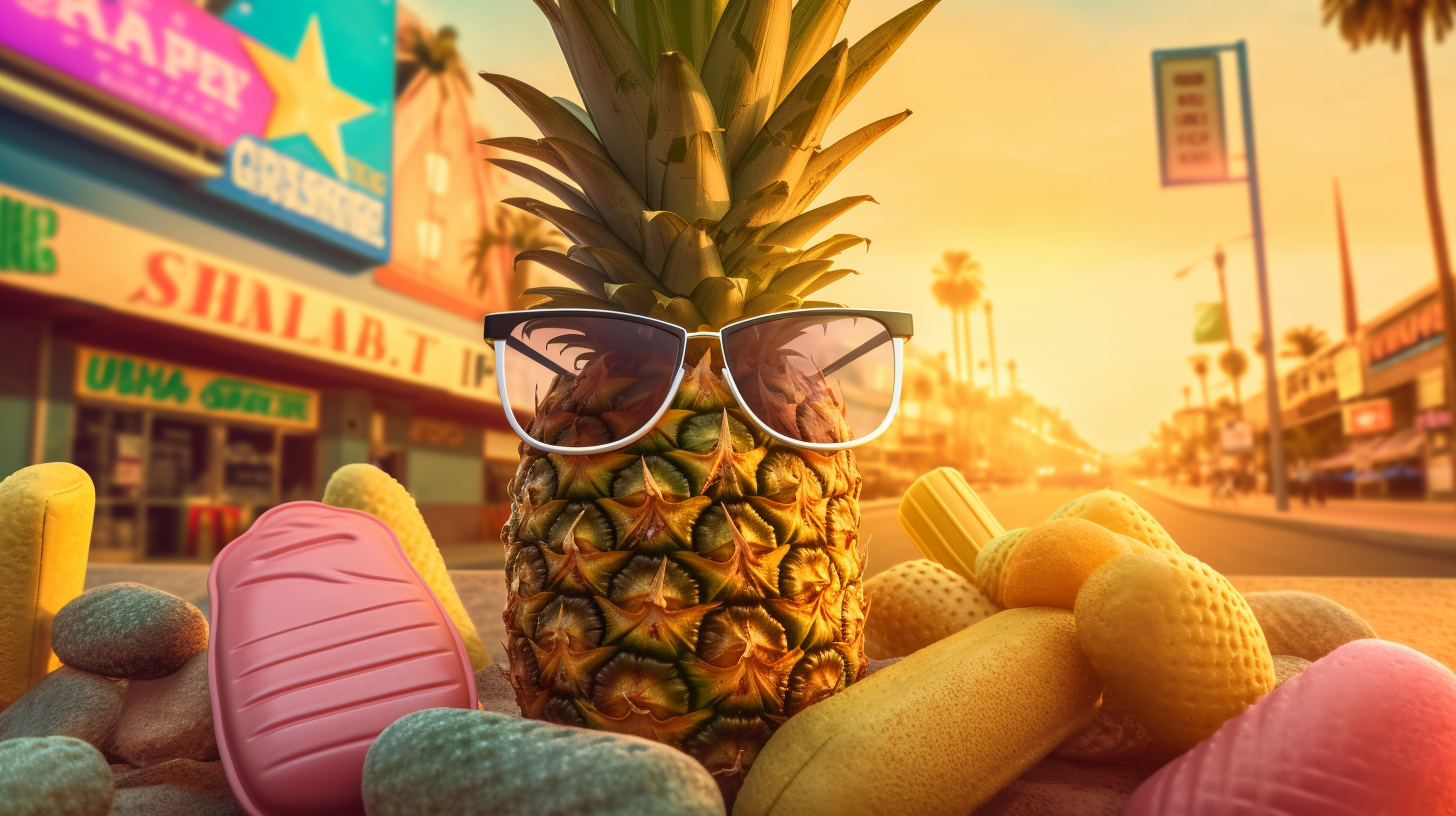

### Introduction

Get ready to be pleasantly astonished! I am about to drop **seven** undeniable signs you've become an advanced Sklearn user without a faintest clue of it happening. And since Sklearn is the most widely used machine learning library on planet Earth, you might as well take these signs as indicators that you are already a very able machine learning practitioner.

Let's get started!

--------------

### 0. Three partitions

Almost everything we do in machine learning is in service of avoiding overfitting. And one of the greatest tools in your arsenal to fight it is splitting your data into not two but three sets!

Cassie Kozyrkov, the head of Decision Intelligence at Google, says that data splitting is the most powerful idea in machine learning and you agree with her.

You are aware that overfitting can occur not only on the train set but also on the second validation set. You've observed that using the same set for both testing and hyperparameter tuning often introduces subtle data leakage. 

By continuously tweaking the hyperparameters based on the performance of the model on that specific validation set, there is a risk of overfitting the model to that particular set.

So, you train your chosen model on 50% of data, tune and evaluate on 25% validation set and just when you think your baby is ready to be deployed in the wild, you test it one final time on the completely untouched and pristine (I mean you haven't even looked at the first five rows) test set. 

With this rule in mind, you've saved this code snippet on your desktop to copy/paste any time you want:

```python
from sklearn.model_selection import train_test_split

def split_dataset(data, target, train_size=0.5, random_state=42):
    # Splitting the dataset into training set and remaining data
    X_train, remaining_data, y_train, remaining_target = train_test_split(
        data, target, train_size=train_size, random_state=random_state
    )
    
    # Splitting the remaining data equally into test and validation sets
    X_val, X_test, y_val, y_test = train_test_split(
        remaining_data, remaining_target, test_size=0.5, random_state=random_state
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test
```

> SYDD! If an unexamined life is not worth living, then here are the four words to live by: Split Your Damned Data. - Cassie Kozyrkov

https://towardsdatascience.com/the-most-powerful-idea-in-data-science-78b9cd451e72

### 1. Setting a common sense baseline

How does a person know if anything they are doing in an ML project is contributing to the end product - the perfect model?

Here, the "I know when I see it" approach is never going to cut it. That person needs a North Star, something they can always refer to in order to know if a model they just trained can pass even the simplest of tests. 

You've seen time and time again in your projects that this crucial North Star is a __common sense baseline__ performance. 

As soon as you determine the machine learning task, your features, and target, you fit either `DummyRegressor` or `DummyClassifier` to them to find out the performance of a random guessing model on your problem. All your subsequent experiments will try to improve that score.

```python
from sklearn.dummy import DummyClassifier

clf = DummyRegressor().fit(X_train, y_train)
clf.score(X_test, y_test)
```

You are also never tired of recommending this practice to others, including your good friend Bex. 

He once foolishly tried all suitable Sklearn models and increasingly complex deep learning architectures for an image classification task to find out why all his experiments were failing to improve beyond a certain threshold.

You indicated that Bex was missing a baseline, and when he tried `DummyClassifier`, he realized that the entire task was unsolvable and all his efforts were a total waste of time because none of his experiments managed to beat a random guessing model. He had to look for a new dataset.

Nothing beats the horror of over-engineering, of being utterly convinced that your model is exceptional, only to realize it is just as effective as a monkey throwing darts blindfolded. 

You taught your friend a valuable lesson.


### 2. Feature selection vs. engineering

When faced with a dataset with dozens or even hundreds of features, you are mindful of your precious time and hardware resources. Instead of blindly busting models on all existing features, you take a step back and try to isolate the most promising ones. 

First, you might look at features one at a time and use variance thresholding to drop the ones with insignificant variances. Then, you look at the bigger picture by analyzing the relationships between features and decide which ones are worthy from there.

To help you decide, you might use metrics such as pairwise correlation coefficients or, even better, employ model-based approaches using classes like `RFECV` (recursive feature elimination with CV) or `SelectFromModel`.

https://towardsdatascience.com/3-step-feature-selection-guide-in-sklearn-to-superchage-your-models-e994aa50c6d2

Afterwards, you apply your feature engineering magic to get the most out of the best features. Here, your knowledge of the intimate differences between numeric transformations such as normalization, standardization, and log transforms will be key.

You understand the trade-offs among `StandardScaler`, `MinMaxScaler`, `QuantileTransformer`, `PowerTransformer`, and more like the back of your hand.

https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94

When it comes to properly imputing missing values, you go beyond simple strategies like mean/mode imputation with `SimpleImputer`. You have a firm grasp on advanced model-based imputation techniques such as `KNNImputer` or `IterativeImputer` and can choose the most appropriate one based on the missingness type.

https://towardsdatascience.com/advanced-missing-data-imputation-methods-with-sklearn-d9875cbcc6eb

As for categorical features, you utilize a variety of techniques to properly encode them, such as `OrdinalEncoder` or `OneHotEncoder`. When using the latter, you are very careful of the dummy-variable trap, which can leak multicollinearity into the dataset.

Even though I just listed feature selection and feature engineering one after the other, you, the seasoned pro, know that you shouldn't lock the two into a rigid order. You iterate between the two, experimenting and refining your approach iteratively.


### 3. Model selection

This is where you showcase the many online courses you've taken or your fancy education didn't go down the drain. 

With an air of total coolness and confidence, you intuitively select the most suitable algorithms and model architectures for the given task. Here, your aim is not always to choose the best-performing model, but rather the model that is most suitable for the problem within the existing constraints.

These constraints act as four giant barriers in your brain:

0. Computation resources: You opt for simpler and smaller models if hardware is limited, even at the cost of lower performance.
1. Time constraints: You lean towards old linear models or shallow trees when forests and deep learning models put too much pressure on your time and budget.
2. Model complexity vs. performance trade-offs: You strike a balance between powerful models with massive predictive power but with a tendency to overfit, and simpler models with lower complexity that may underfit.
3. Interpretability: You prioritize linear models or trees when model explainability and stakeholder confidence are essential.
4. Dataset size: You guide model selection based on the size of the data. Some models excel on large datasets, such as deep learning models, while models like SVMs are more suitable for small datasets.

Model selection is an art, and you treat it like so.

--------------

### 4. Strategic cross-validation

If there is one thing you enjoy more than splitting your data into three, it's cross-validation. Whenever your time and resource constraints allow it, you strive to use appropriate CV strategies all the time.

You are well aware that CV is the method that provides the most reliable estimation of model performance, making it your most valuable tool in combating overfitting or underfitting.

In addition to the simple `KFold` CV you learned in middle school, you leverage other powerful strategies, such as:

1. `StratifiedKFold` - for classification tasks.
2. `RepeatedKFold` - when you are particularly vigilant about model performance.
3. `ShuffleSplit` - for more control over train/test splits.
4. `GroupKFold` - for non-IID data (independent and identically distributed).
5. `TimeSeriesSplit` - for time series data.

https://towardsdatascience.com/one-stop-tutorial-on-all-cross-validation-techniques-you-can-should-use-7e1645fb703c

In your cross-validation endeavors, Sklearn pipelines hold a special place. Instead of performing preprocessing outside and modeling inside the CV splitter, you combine them all into a single pipeline.

Pipelines are your extra safeguard against data leakage and allow you to write readable, modular code that is a delight for others to read.

https://medium.com/towards-data-science/sklearn-pipelines-for-the-modern-ml-engineer-9-techniques-you-cant-ignore-637788f05df5

### 5. Total control over randomness

You don't joke around with randomness. You have learned from experience that keeping a tight leash on the pseudo-random generator can save you hours in terms of:

- Reproducibility
- Debugging and testing
- Model performance comparison
- Hyperparameter tuning

You are also justifiedly proud in knowing the nuances of various seeding methods:

1. `random_state=None` - Sklearn uses the global NumPy seed set with `np.random.seed(seed_number)` as the default behavior. In this case, each call to functions that involve randomness, such as `fit`, `train_test_split`, `split`, CV classes, etc., produces different results.
2. `random_state=integer` - calling functions (as mentioned above) that rely on randomness always produces the same results for the given integer seed. You have your favorite seed (mine is 1121218).
3. `random_state=np.random.RandomState` (an RNG instance) - this seeding method provides the most robust CV results, although passing integers is considered safer and preferable. It returns different results in each run.

And you have a weekly reminder on your iPhone to read the [Controlling randomness](https://scikit-learn.org/stable/common_pitfalls.html#controlling-randomness) section of the Sklearn user guide so that these details don't leak out from memory.

### 6. Not using Sklearn for hyperparameter tuning

You respect for Sklearn for introducing `HalvingGridSearch` and `HalvingRandomSearch` to fix the slower-than-a-turtle `GridSearch` but at this point of your workflow, you switch to other tools.

Like the cool kids of today, your go-to choice is Optuna. It's more Pythonic, intelligent, and offers an awful lot of trinkets that Sklearn won't even consider adding.

Your most favorite features of Optuna are:

- Seamless integration with various frameworks: Jupyter, Sklearn, XGBoost, CatBoost, TensorFlow, PyTorch, you name it.
- State-of-the-art tuning algorithms with names that you can't even pronounce.
- Automatic elimination of unpromising hyperparameters before the tuning process even begins.
- More Pythonic and readable parameter grids.
- Visualization and analysis capabilities, including parameter importance plots, parallel coordinate plots, and optimization history plots.
- Distributed computing to leverage multiple cores.

And quite possibly, your favorite Optuna tutorial is this:

https://towardsdatascience.com/why-is-everyone-at-kaggle-obsessed-with-optuna-for-hyperparameter-tuning-7608fdca337c

### 7. Model evaluation on another level

Just like you are a master at cooking the main course, you excel at preparing the dessert - model evaluation.

Countless times in your life, you've called:

```python
import sklearn

sklearn.metrics.SCORERS.keys()
```

to look at all the options you have for measuring your model's performance. Rather than settling for a single metric from this list, you prefer to choose multiple metrics to assess and optimize your model from various angles.

https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

Your biggest strength in this regard is differentiating between all the crazy classification metrics and the subtle ways they change based on whether your chosen classifier is OVO or OVR. 

You've also been called a geek a couple times for setting these images as auto-changing wallpapers on your phone (but you aren't bothered in the slightest :).

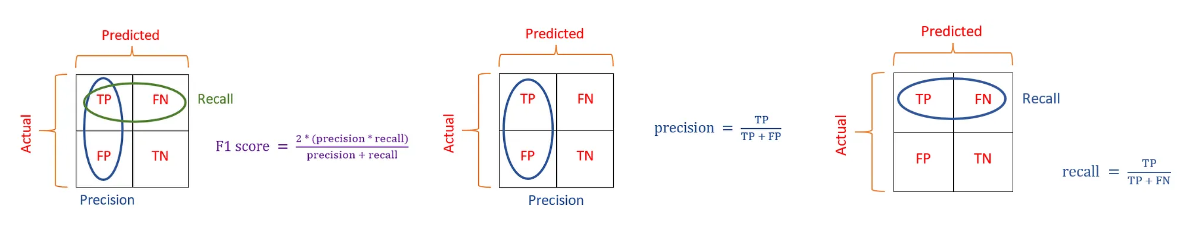

And trying hard not to show off, you use some of the following visualization tools for a more accurate depiction of your model's performance:

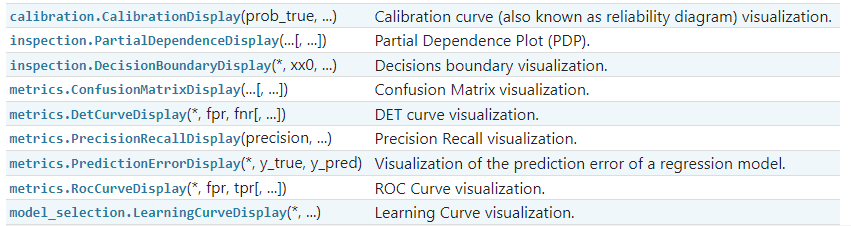

https://scikit-learn.org/stable/visualizations.html#available-plotting-utilities

### Conclusion

Even though the title and article had a playful tone in acknowledging the old Sklearn pro, my underlying intention was to offer guidance to beginners. I wanted to bridge the gap between the worn-out, copy/paste knowledge rampant in cheap online courses and the practical knowledge and expertise that can only be gained through months of real-world practice and experience.

I hope this article has provided both entertainment and inspiration for you to explore  the depths of Sklearn and become a master at it!

Thank you for reading!

-----------

Loved this article and, let's face it, its bizarre writing style? Imagine having access to dozens more just like it, all written by a brilliant, charming, witty author (that's me, by the way :).

For only 4.99$ membership, you will get access to not just my stories, but a treasure trove of knowledge from the best and brightest minds on Medium. And if you use [my referral link](https://ibexorigin.medium.com/membership), you will earn my supernova of gratitude and a virtual high-five for supporting my work.

https://ibexorigin.medium.com/membership

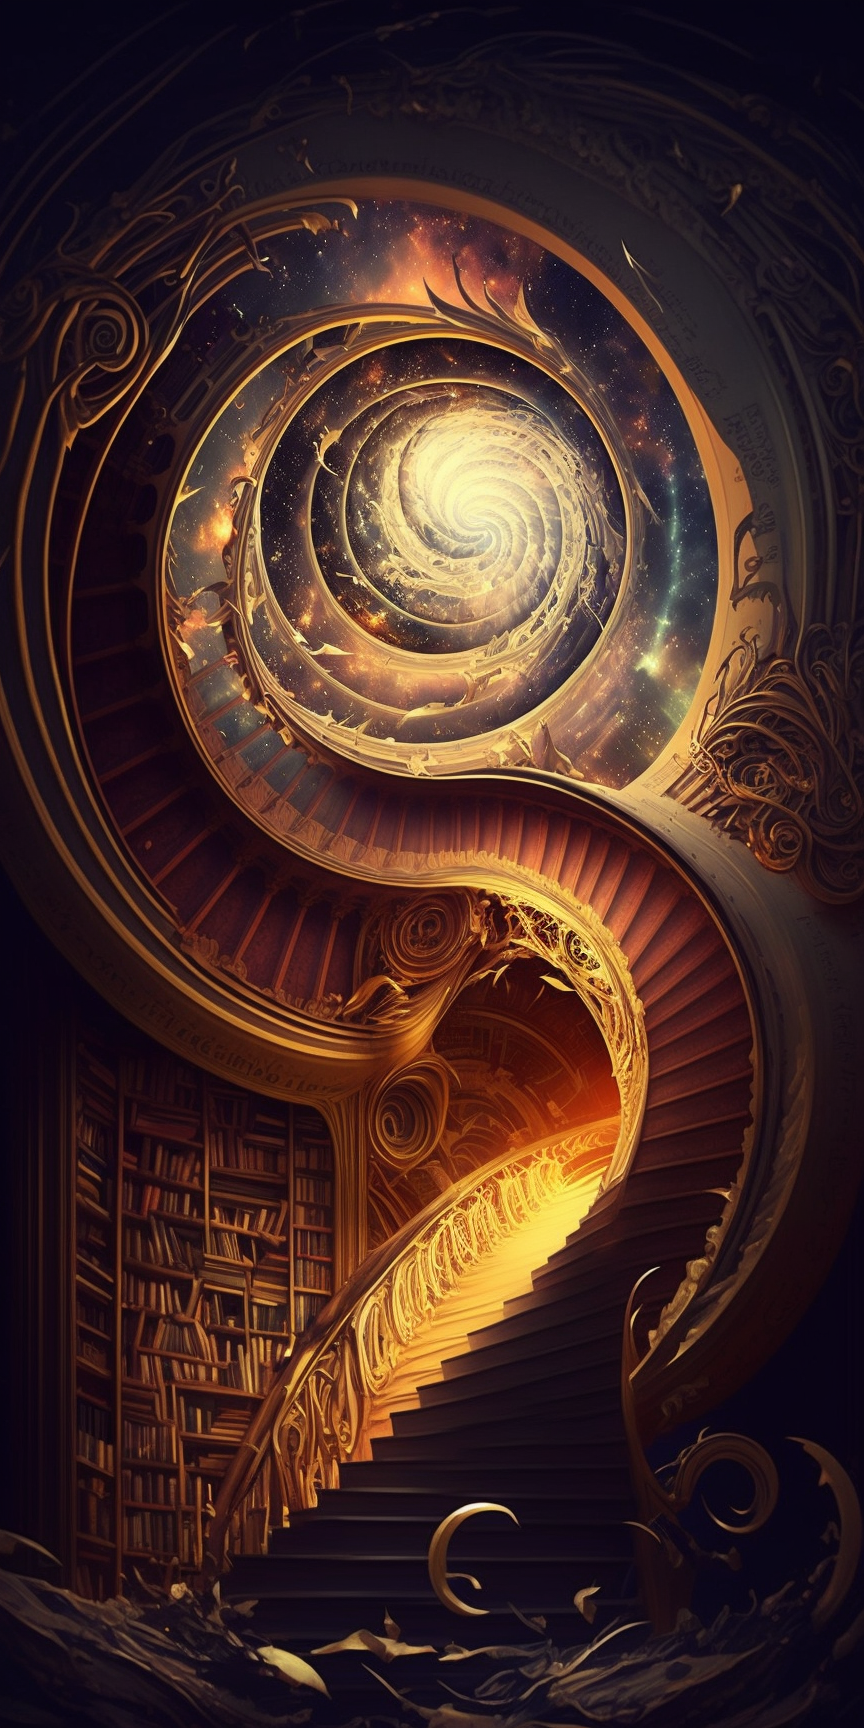

Image by me with Midjourney